In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [55]:
Insurance_df = pd.read_csv('insurance.csv')
Insurance_df_cpy = Insurance_df
Insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [57]:
Insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [58]:
Insurance_df[(Insurance_df['charges'] > 50000)]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [59]:
Insurance_df['sex'] = Insurance_df['sex'].map({'male':1, 'female':0})

In [60]:
Insurance_df['smoker'] = Insurance_df['smoker'].map({'yes':1, 'no':0})

In [61]:
Insurance_df['region'] = Insurance_df['region'].map({'southwest':1, 'southeast':0, 'northwest':2, 'northeast':3})

# Building Model

In [62]:
y = Insurance_df['charges']
X = Insurance_df.drop(columns=['charges'], axis=1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=69)

In [64]:
model = LinearRegression()

In [65]:
model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(X_test)

In [67]:
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

RMSE:  6654.673407115423
MAE:  4507.394008669998
R2 Score:  0.7439865093428583


In [68]:
# Difference Between Mean:
print('Original Mean: ', y_test.mean())
print('Predicted Mean: ', y_pred.mean())

Original Mean:  14725.721012089554
Predicted Mean:  13945.936915689485


In [70]:
c=model.intercept_
m = model.coef_
print('Intercept: ', c)
print('Coefficient: ', m)
print(f'Equation of line: y = {m}x {c}')

Intercept:  -13628.673889923462
Coefficient:  [  251.97258515  -217.32482747   356.09943923   525.23633579
 23731.65107356   425.69716231]
Equation of line: y = [  251.97258515  -217.32482747   356.09943923   525.23633579
 23731.65107356   425.69716231]x -13628.673889923462


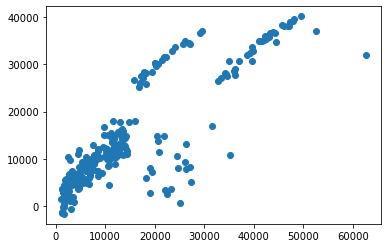

In [71]:
plt.scatter(y_test, y_pred)